In [2]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.7 MB/s eta 0:00:00


Episode 500: Average Reward (Last 500): 0.016
Episode 1000: Average Reward (Last 500): 0.026
Episode 1500: Average Reward (Last 500): 0.046
Episode 2000: Average Reward (Last 500): 0.088
Episode 2500: Average Reward (Last 500): 0.116
Episode 3000: Average Reward (Last 500): 0.114
Episode 3500: Average Reward (Last 500): 0.202
Episode 4000: Average Reward (Last 500): 0.234
Episode 4500: Average Reward (Last 500): 0.296
Episode 5000: Average Reward (Last 500): 0.36
Episode 5500: Average Reward (Last 500): 0.41
Episode 6000: Average Reward (Last 500): 0.522
Episode 6500: Average Reward (Last 500): 0.496
Episode 7000: Average Reward (Last 500): 0.608
Episode 7500: Average Reward (Last 500): 0.604
Episode 8000: Average Reward (Last 500): 0.65
Episode 8500: Average Reward (Last 500): 0.67
Episode 9000: Average Reward (Last 500): 0.7
Episode 9500: Average Reward (Last 500): 0.702
Episode 10000: Average Reward (Last 500): 0.692
Episode 10500: Average Reward (Last 500): 0.676
Episode 11000: Ave

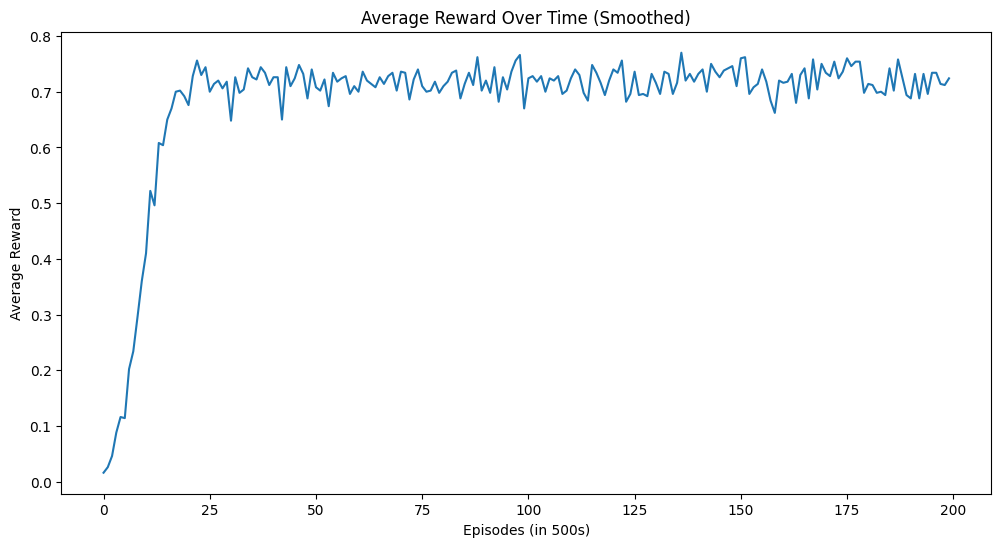

In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Initialize the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Set the parameters for Q-learning
n_states = env.observation_space.n  # Number of states in the environment
n_actions = env.action_space.n  # Number of possible actions
q_table = np.zeros((n_states, n_actions))  # Initialize Q-table with zeros

# Hyperparameters (tuned for better learning)
alpha = 0.8  # Initial learning rate
gamma = 0.95  # Discount factor to consider future rewards
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.9995  # Decay rate for epsilon (encourages faster convergence)
min_epsilon = 0.01  # Minimum value for epsilon
alpha_decay = 0.9995  # Gradual decay for learning rate

# Training parameters
episodes = 100000  # Number of episodes for training
max_steps = 200  # Maximum steps per episode (to give agent ample exploration opportunity)

# Initialize tracking variables for performance
rewards = []
avg_rewards = []

# Function for choosing an action using the epsilon-greedy strategy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: randomly select an action
    else:
        return np.argmax(q_table[state, :])  # Exploit: select the action with max Q-value

# Training loop with performance tracking
for episode in range(episodes):
    state, _ = env.reset()  # Reset the environment at the start of each episode
    done = False
    step = 0
    total_reward = 0  # Track total reward for this episode

    while not done and step < max_steps:
        action = choose_action(state, epsilon)  # Select an action based on epsilon-greedy policy
        next_state, reward, done, _, _ = env.step(action)  # Execute action and observe result

        # Update Q-value using the Bellman equation
        q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state, :])
        new_q_value = (1 - alpha) * q_value + alpha * (reward + gamma * max_next_q_value)
        q_table[state, action] = new_q_value

        state = next_state
        step += 1
        total_reward += reward  # Accumulate reward for this episode

    rewards.append(total_reward)  # Track rewards for each episode

    # Calculate the average reward over the last 500 episodes for performance tracking
    if (episode + 1) % 500 == 0:
        avg_reward = np.mean(rewards[-500:])
        avg_rewards.append(avg_reward)
        print(f"Episode {episode + 1}: Average Reward (Last 500): {avg_reward}")

    # Decay epsilon and alpha to balance exploration and learning
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    alpha = max(0.01, alpha * alpha_decay)

# Plotting the average rewards over time
plt.figure(figsize=(12, 6))
plt.plot(avg_rewards)
plt.xlabel('Episodes (in 500s)')
plt.ylabel('Average Reward')
plt.title('Average Reward Over Time (Smoothed)')
plt.show()

# Test the agent after training
test_episodes = 10  # Number of test episodes
for episode in range(test_episodes):
    state, _ = env.reset()  # Reset the environment for testing
    done = False
    step = 0
    print(f"Test Episode {episode + 1}")

    while not done and step < max_steps:
        action = np.argmax(q_table[state, :])  # Choose the best action based on Q-table
        next_state, reward, done, _, _ = env.step(action)  # Perform action
        env.render()  # Display the environment's state
        state = next_state  # Move to the next state
        step += 1

        if done:
            print(f"Finished in {step} steps with reward {reward}")
            break

env.close()


This code demonstrates **Q-learning**, a classic reinforcement learning algorithm, using the `FrozenLake-v1` environment from the `gymnasium` library. Explanation of the key components:

---

### **Imports**
- **`numpy as np`**: For mathematical operations and array manipulations.
- **`gymnasium as gym`**: Provides the FrozenLake environment for reinforcement learning.
- **`matplotlib.pyplot as plt`**: Used for visualizing training performance.

---

### **Initialization**
- **Environment**:
  ```python
  env = gym.make("FrozenLake-v1", is_slippery=True)
  ```
  Creates the FrozenLake environment. The `is_slippery=True` parameter makes the lake "slippery," adding randomness to actions (stochastic transitions).

- **Q-Table**:
  ```python
  q_table = np.zeros((n_states, n_actions))
  ```
  Initializes the Q-table to zeros. This table is used to store the Q-values for state-action pairs, where:
  - **`n_states`**: Number of states in the environment.
  - **`n_actions`**: Number of possible actions.

---

### **Hyperparameters**
- **`alpha`**: Learning rate (how much new information overrides old).
- **`gamma`**: Discount factor (importance of future rewards).
- **`epsilon`**: Exploration rate (probability of choosing random actions).
- **Decay rates**:
  - `epsilon_decay` reduces exploration over time, favoring exploitation.
  - `alpha_decay` gradually reduces the learning rate to stabilize learning.

---

### **Epsilon-Greedy Strategy**
- **Exploration vs. Exploitation**:
  ```python
  if np.random.uniform(0, 1) < epsilon:
      return env.action_space.sample()  # Explore
  else:
      return np.argmax(q_table[state, :])  # Exploit
  ```
  The agent randomly explores or selects the action with the highest Q-value for a given state based on `epsilon`.

---

### **Training Loop**
The agent is trained over `episodes` using the following steps:
1. **Reset Environment**:
   ```python
   state, _ = env.reset()
   ```
   Start a new episode.
2. **Choose Action**:
   ```python
   action = choose_action(state, epsilon)
   ```
   Decide the next move using the epsilon-greedy strategy.
3. **Take Action**:
   ```python
   next_state, reward, done, _, _ = env.step(action)
   ```
   Execute the action in the environment and observe:
   - `next_state`: Resulting state.
   - `reward`: Immediate reward.
   - `done`: Whether the episode has ended.
4. **Update Q-Value** (Bellman Equation):
   ```python
   q_value = q_table[state, action]
   max_next_q_value = np.max(q_table[next_state, :])
   new_q_value = (1 - alpha) * q_value + alpha * (reward + gamma * max_next_q_value)
   q_table[state, action] = new_q_value
   ```
   Adjust the Q-value for the current state-action pair based on:
   - Current Q-value.
   - Immediate reward.
   - Maximum Q-value of the next state (future reward).
5. **Update State**:
   ```python
   state = next_state
   ```
6. **Track Rewards**:
   - Store total reward for the episode.
   - Calculate average reward every 500 episodes for performance monitoring.
7. **Decay Parameters**:
   Gradually reduce exploration (`epsilon`) and learning rate (`alpha`).

---

### **Performance Visualization**
```python
plt.plot(avg_rewards)
```
The plot shows how average rewards evolve, helping evaluate whether the agent improves over time.

---

### **Testing**
After training:
1. Run test episodes where the agent always chooses the action with the highest Q-value (`np.argmax`).
2. Use `env.render()` to visualize the agent's performance.

---

### **Key Concepts**
1. **Exploration-Exploitation Tradeoff**: Balances learning new strategies vs. exploiting known ones.
2. **Q-Learning**: Uses the Bellman equation to update state-action values iteratively.
3. **Epsilon Decay**: Encourages the agent to exploit more as training progresses.
4. **FrozenLake**: A grid-world task where the goal is to reach the goal (G) while avoiding holes (H).

---

### **Purpose**
This code trains an agent to navigate the FrozenLake environment efficiently using Q-learning. The agent starts by exploring randomly and gradually learns an optimal policy, minimizing slips and falls into holes.